<a href="https://colab.research.google.com/github/hiteshtanejaa/PDF_Scrapper-Pie-Chart-/blob/main/result_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os
import sys
import camelot
import PyPDF2
# Re-defining the updated getCollege_updated function
def getCollege_updated(path, code):
    pages = []
    try:
        with open(path, 'rb') as pdfFileObj:
            pdfReader = PyPDF2.PdfReader(pdfFileObj)
            for pageNO in range(len(pdfReader.pages)):
                pageObj = pdfReader.pages[pageNO]
                revInfo = pageObj.extract_text()[123:135]
                if code in revInfo:
                    print(f"Code {code} found on page {pageNO+1}")
                    pages.append(int(pageNO)+1)
    except Exception as e:
        print(f"Error reading PDF file: {e}")
    return pages

# Re-defining the updated parse function
def parse(input_pages, pdf_path):
    try:
        # Check and create the output directory
        output_dir = '/content/output'
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        # Parse the tables from the PDF
        tables = camelot.read_pdf(pdf_path, pages=','.join(map(str, input_pages)))
        output_file = os.path.join(output_dir, 'output.csv')
        tables.export(output_file, f='csv', compress=True)
        print('---Parsing Complete. CSV File Generated and Saved in Output Folder---')
        return output_file  # Returning the path to the output file for reference
    except Exception as e:
        print(f"Error parsing PDF: {e}")
        return None

# Test the updated parse function
test_code = "058"  # Test college code
pdf_test_path = 'G570 Computer Science 1st year.pdf'  # Path to the uploaded PDF

found_pages_test = getCollege_updated(pdf_test_path, test_code)
if found_pages_test:
    output_csv_path = parse(found_pages_test, pdf_test_path)
    print(output_csv_path)
else:
    print("No pages found with the given code.")


Code 058 found on page 141
Code 058 found on page 142
Code 058 found on page 143
Code 058 found on page 144
Code 058 found on page 145
Code 058 found on page 146
Code 058 found on page 147
Code 058 found on page 148
---Parsing Complete. CSV File Generated and Saved in Output Folder---
/content/output/output.csv


In [19]:
from pyunpack import Archive
Archive('/output/output.zip').extractall("/content/output")

import os
import glob
import pandas as pd
os.chdir("/content/output")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

df1 = pd.read_csv('combined_csv.csv')
df2=df1[['Roll No','CGPA']]
print(df2)
df2.to_csv("result.csv")

                             Roll No        CGPA
0          17058570028 KHUSHAL SINGH  6.45\n6.11
1   17058570029 SUDEEPT NAVAL MISHRA  8.00\n7.04
2                 17058570030 ADITYA  8.14\n7.18
3     17058570031 VARUN KUMAR MISHRA  8.86\n8.61
4      17058570032 SUPRIYO MUKHERJEE  6.59\n6.61
5            17058570033 SUMIT JOSHI  6.18\n6.18
6                               PRMS         NaN
7              17058570014 ANKUR ROY  8.32\n7.75
8           17058570016 MUSKAN GUPTA  6.82\n6.11
9        17058570018 TANISH BHARDWAJ  6.95\n5.79
10       17058570019 KUNTAL MAJUMDER  8.73\n8.75
11    17058570020 PRIKSHIT CHOUDHARY  7.68\n6.79
12           17058570021 NEERAJ KUMR  7.55\n7.82
13                              PRMS         NaN
14          17058570007 VISHAL KUMAR  4.86\n4.82
15       17058570008 VARNITA RASTOGI  7.77\n7.93
16           17058570009 RAHUL GULIA  7.64\n8.00
17         17058570010 VISHESH KUMAR  7.18\n6.39
18          17058570012 TARUN TANWAR  6.41\n7.64
19         170585700

In [21]:
import csv

lines = list()

members= 'PRMS'

with open('/content/output/result.csv', 'r') as readFile:

    reader = csv.reader(readFile)

    for row in reader:

        lines.append(row)

        for field in row:

            if field == members:

                lines.remove(row)
    print("Removed Rows containing Unwanted Values")
with open('/content/output/mycsv.csv', 'w') as writeFile:

    writer = csv.writer(writeFile)

    writer.writerows(lines)


Removed Rows containing Unwanted Values


In [30]:
import pandas as pd

df = pd.read_csv("/content/output/mycsv.csv")

In [32]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [36]:
# Splitting the 'Roll No' column into 'Roll No' and 'Name'
df[['Roll No', 'Name']] = df['Roll No'].str.extract(r'(\d+) (.+)', expand=True)

# Splitting the 'CGPA' column into 'CGPA 1' and 'CGPA 2'
df[['CGPA 1', 'CGPA 2']] = df['CGPA'].str.split('\n', expand=True)

# Convert 'CGPA 1' and 'CGPA 2' to numeric
df['CGPA 1'] = pd.to_numeric(df['CGPA 1'])
df['CGPA 2'] = pd.to_numeric(df['CGPA 2'])

# Display the modified DataFrame
print(df)

        Roll No        CGPA                  Name  CGPA 1  CGPA 2
0   17058570028  6.45\n6.11         KHUSHAL SINGH    6.45    6.11
1   17058570029  8.00\n7.04  SUDEEPT NAVAL MISHRA    8.00    7.04
2   17058570030  8.14\n7.18                ADITYA    8.14    7.18
3   17058570031  8.86\n8.61    VARUN KUMAR MISHRA    8.86    8.61
4   17058570032  6.59\n6.61     SUPRIYO MUKHERJEE    6.59    6.61
5   17058570033  6.18\n6.18           SUMIT JOSHI    6.18    6.18
6   17058570014  8.32\n7.75             ANKUR ROY    8.32    7.75
7   17058570016  6.82\n6.11          MUSKAN GUPTA    6.82    6.11
8   17058570018  6.95\n5.79       TANISH BHARDWAJ    6.95    5.79
9   17058570019  8.73\n8.75       KUNTAL MAJUMDER    8.73    8.75
10  17058570020  7.68\n6.79    PRIKSHIT CHOUDHARY    7.68    6.79
11  17058570021  7.55\n7.82           NEERAJ KUMR    7.55    7.82
12  17058570007  4.86\n4.82          VISHAL KUMAR    4.86    4.82
13  17058570008  7.77\n7.93       VARNITA RASTOGI    7.77    7.93
14  170585

In [37]:
df.drop(columns=["CGPA"],inplace=True)

In [38]:
df

,Roll No,Name,CGPA 1,CGPA 2
0,17058570028,KHUSHAL SINGH,6.45,6.11
1,17058570029,SUDEEPT NAVAL MISHRA,8.00,7.04
2,17058570030,ADITYA,8.14,7.18
3,17058570031,VARUN KUMAR MISHRA,8.86,8.61
4,17058570032,SUPRIYO MUKHERJEE,6.59,6.61
5,17058570033,SUMIT JOSHI,6.18,6.18
6,17058570014,ANKUR ROY,8.32,7.75
7,17058570016,MUSKAN GUPTA,6.82,6.11
8,17058570018,TANISH BHARDWAJ,6.95,5.79
9,17058570019,KUNTAL MAJUMDER,8.73,8.75


In [41]:
df["CGPA"] = (df['CGPA 1'] + df['CGPA 2'])/2

In [46]:
df.to_csv('/content/output/mycsv.csv')

 CGPA below 4 0 , CGPA below 7 21 , CGPA above 7 21 , CGPA above 9 or equal to 10 5 


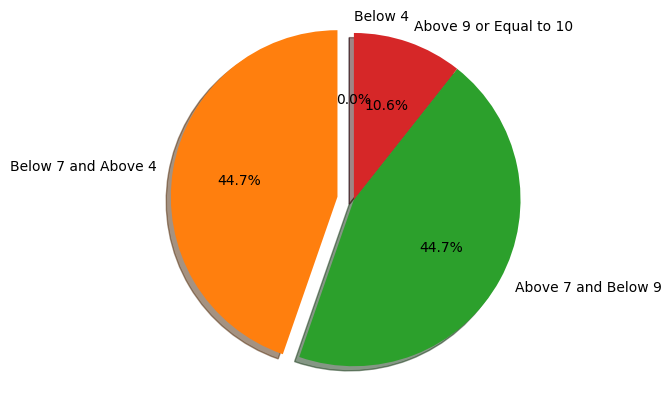

In [48]:
import csv
import matplotlib.pyplot as plt
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie
with open('/content/output/mycsv.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    below7 = 0
    above7 =0
    above9orequalto10 = 0
    below4 = 0
    for row in reader:
        if row['CGPA'] < '7' and row['CGPA'] > '4' :
            below7 = below7 + 1
        elif row['CGPA'] >= '7' and row['CGPA'] < '9':
            above7 = above7 + 1
        elif row['CGPA'] >= '9' :
            above9orequalto10 = above9orequalto10 + 1
        elif row['CGPA'] <= '4' and row['CGPA'] > '0' :
            below4 = below4 + 1

print (f' CGPA below 4 {below4} , CGPA below 7 {below7} , CGPA above 7 {above7} , CGPA above 9 or equal to 10 {above9orequalto10} ')



labels = 'Below 4', 'Below 7 and Above 4', 'Above 7 and Below 9', 'Above 9 or Equal to 10 '
sizes = [below4, below7, above7, above9orequalto10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()